<a href="https://www.kaggle.com/code/vidhyaanand/postpartum-depression-1-0?scriptVersionId=119264161" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/postpartum-depression/post natal data.csv


In [2]:
df = pd.read_csv("/kaggle/input/postpartum-depression/post natal data.csv", delimiter=',', encoding='utf8')
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [3]:
df=df.drop('Timestamp',axis=1)

In [4]:
df.isna().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()
df.shape

(1491, 10)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

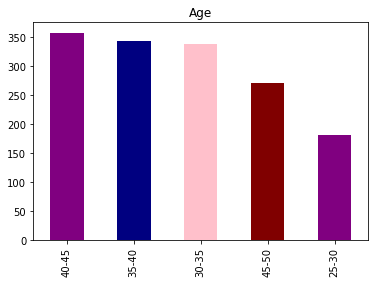

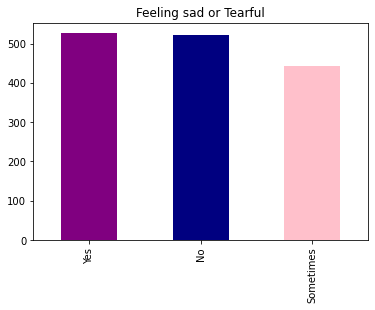

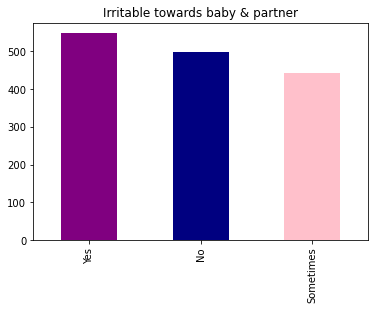

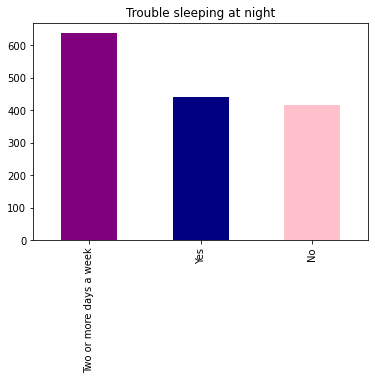

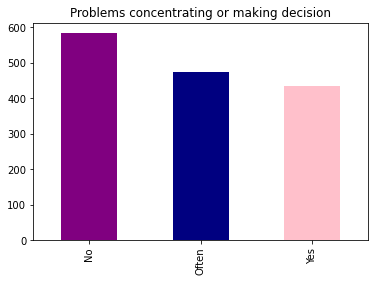

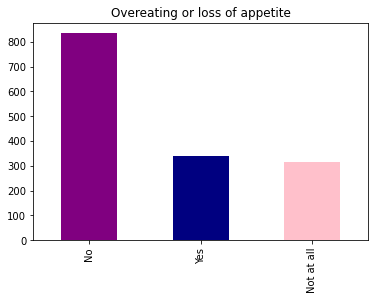

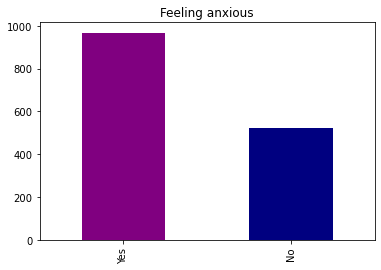

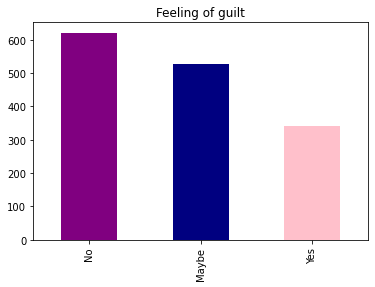

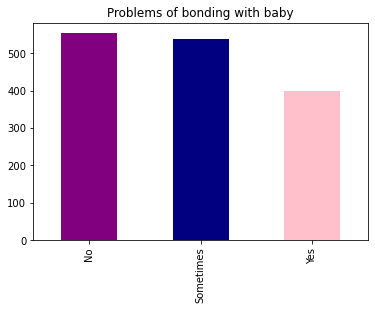

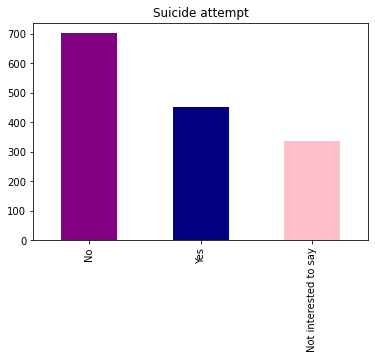

In [8]:
# Iterate through all columns
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        counts = df[col].value_counts()  # Get value counts of column
        counts.plot.bar(color=['purple', 'navy', 'pink', 'maroon'])  # Generate a bar plot of value counts
        plt.title(col)  # Set the title of the plot to the column name
        plt.show()  # Show the plot


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer



In [10]:
features = df.drop('Feeling anxious',axis=1)  # features are based on cleaned dataset
target = df.loc[:, 'Feeling anxious']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.3, # use 30% of data as test set
                                                                            random_state=1)

display(features_train.head())
display(features_train.shape)
display(features_test.shape)
display(target_train.shape)
display(target_test.shape)

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt
189,45-50,Yes,No,Yes,Often,No,No,Yes,No
562,30-35,Sometimes,Yes,Two or more days a week,Yes,No,No,Yes,Yes
1023,25-30,No,Sometimes,Yes,No,Yes,Yes,No,Yes
636,45-50,No,Yes,No,Yes,Not at all,Maybe,No,Not interested to say
242,45-50,Yes,No,No,No,Yes,Yes,No,No


(1043, 9)

(448, 9)

(1043,)

(448,)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

# Specify which columns should be transformed and by which transformer

preprocessor = ColumnTransformer(transformers=[('cat',OneHotEncoder(), 
                                                ['Age','Feeling sad or Tearful','Irritable towards baby & partner',
                                                 'Trouble sleeping at night','Problems concentrating or making decision',
                                                 'Overeating or loss of appetite','Feeling of guilt','Problems of bonding with baby',
                                                 'Suicide attempt'])])

# Fit and transform the data
                                 
features_train_transform = preprocessor.fit_transform(features_train)
print(features_train_transform.shape)
features_test_transform = preprocessor.transform(features_test)
print(features_test_transform.shape)




(1043, 29)
(448, 29)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Define a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0),
    'Naive Bayes': CategoricalNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machines': SVC(kernel='linear', C=1.0),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)
}

# Loop through the models and train and test each model
for name, model in models.items():
    print('Training and testing', name)
    model.fit(features_train_transform, target_train)
    y_pred = model.predict(features_test_transform)
    accuracy = accuracy_score(target_test, y_pred)
    print('Accuracy:', accuracy)
    


Training and testing Decision Tree
Accuracy: 0.8816964285714286
Training and testing Random Forest
Accuracy: 0.9241071428571429
Training and testing Gradient Boosting
Accuracy: 0.9821428571428571
Training and testing Naive Bayes
Accuracy: 0.8102678571428571
Training and testing K-Nearest Neighbors
Accuracy: 0.9107142857142857
Training and testing Support Vector Machines
Accuracy: 0.8459821428571429
Training and testing Neural Networks
Accuracy: 0.9821428571428571
